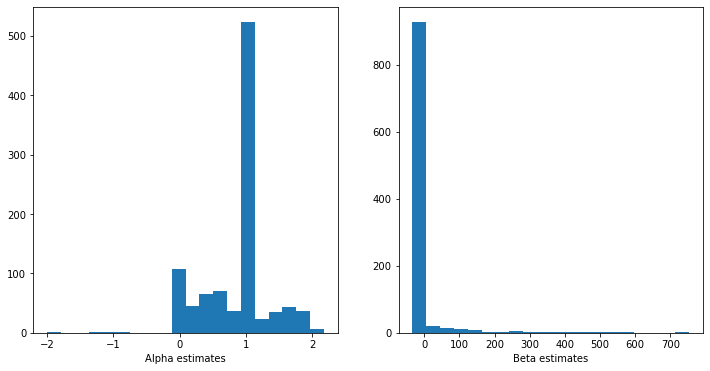

The alpha_estimate that corresponds to the tallest bar in the histogram is 1.0
The beta_estimate that corresponds to the tallest bar in the histogram is 0.4054649574694922


In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import stats
import matplotlib.pyplot as plt

def acttatards(N, A, B):
    states, actions, R= [], [], []
    Q = {'6kHz': {'L': 0, 'R': 0}, '10kHz': {'L': 0, 'R': 0}}
    Q_history = [Q.copy()]
    for t in range(N):
        random_val = np.random.uniform(0, 1)
        random_val1 = np.random.uniform(0, 1)
        random_val2 = np.random.uniform(0, 1)
        if random_val < 0.5:
            states.append('6kHz')
        else:
            states.append('10kHz')
        
        P_L = np.exp(B * Q[states[t]]['L']) / (np.exp(B * Q[states[t]]['L']) + np.exp(B * Q[states[t]]['R']))
        action = 'L' if random_val1 <= P_L else 'R'
        actions.append(action)

        if ((states[t] == '6kHz' and actions[t] == 'L') or (states[t] == '10kHz' and actions[t] == 'R')) and (random_val2 < 0.9):
            R.append(1)
        elif ((states[t] == '6kHz' and actions[t] == 'R') or (states[t] == '10kHz' and actions[t] == 'L')) and (random_val2 < 1 - 0.9):
            R.append(1)
        else:
            R.append(0)

        Q[states[t]][actions[t]] = Q[states[t]][actions[t]] + A * (R[t] - Q[states[t]][actions[t]])
        Q_history.append(Q.copy())

    return actions, states, Q, Q_history, R

def DeltaLearningRule(N, A, B, actions, states, R):
    Q = {'6kHz': {'L': 0, 'R': 0}, '10kHz': {'L': 0, 'R': 0}}
    for t in range(N):
        Q[states[t]][actions[t]] = Q[states[t]][actions[t]] + A * (R[t] - Q[states[t]][actions[t]])
    return Q

def Log(N, Q, actions, states, B):
    Log, P = [], []
    epsilon = 1e-10  # small constant to avoid log(0)
    for t in range(N):
        if states[t]=='6kHz' and actions[t]=='L':
            P.append(np.exp(np.clip(B*Q['6kHz']['L'], -500, 500)) / (np.exp(np.clip(B*Q['6kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['6kHz']['R'], -500, 500))))
        elif states[t]=='6kHz' and actions[t]=='R':
            P.append(np.exp(np.clip(B*Q['6kHz']['R'], -500, 500)) / (np.exp(np.clip(B*Q['6kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['6kHz']['R'], -500, 500))))
        elif states[t]=='10kHz' and actions[t]=='R':
            P.append(np.exp(np.clip(B*Q['10kHz']['R'], -500, 500)) / (np.exp(np.clip(B*Q['10kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['10kHz']['R'], -500, 500))))
        else:  
            P.append(np.exp(np.clip(B*Q['10kHz']['L'], -500, 500)) / (np.exp(np.clip(B*Q['10kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['10kHz']['R'], -500, 500))))
        Log.append(np.log(P[t] + epsilon)) 
    return Log


def neg_log_likelihood(params, N, actions, states, R):
    A, B = params
    Q = DeltaLearningRule(N, A, B, actions, states, R)
    log_likelihood = Log(N, Q, actions, states, B)
    return -np.sum(log_likelihood)

# Set the number of trials and create arrays to hold the estimates
num_runs = 1000
alpha_estimates = np.zeros(num_runs)
beta_estimates = np.zeros(num_runs)
N=100
# Loop over the number of trials
for i in range(num_runs):

    # Generate new observed data each time
    observed_actions, observed_states,_,_,observed_rewards = acttatards(N, 1, 0.404)

    # Provide some initial guess for alpha and beta
    initial_guess = [1, 0.404]

    # Use minimize function to estimate alpha and beta
    result = minimize(neg_log_likelihood, initial_guess, args=(N, observed_actions, observed_states, observed_rewards))

    # Store the estimates
    alpha_estimates[i], beta_estimates[i] = result.x
    # print(alpha_estimates[i], beta_estimates[i])

# Plot histograms of the estimates
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(alpha_estimates, bins=20)
plt.xlabel('Alpha estimates')

plt.subplot(1, 2, 2)
plt.hist(beta_estimates, bins=20)
plt.xlabel('Beta estimates')

plt.show()

 

alpha_mode = stats.mode(alpha_estimates)
beta_mode = stats.mode(beta_estimates)

print(f"The alpha_estimate that corresponds to the tallest bar in the histogram is {alpha_mode.mode}")
print(f"The beta_estimate that corresponds to the tallest bar in the histogram is {beta_mode.mode}")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.404, 0.404, 0.4054651066131033, 0.4054650916161402, 0.40546509741645415, 0.24116208477935677, 0.40546511181511385, 0.4054651095014333, 0.40546508087060096, 0.405465101743275, 0.5753641698753161, 0.4054651476392964, 0.405465103292628, 0.21622310499079164, 0.40546507887646355, 0.40546510469390473, 0.4054650494666209, 0.4054650692032899, 0.4054650128930712, 0.31845378199994534]


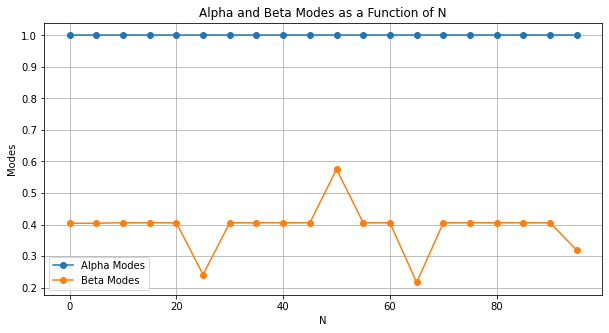

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import stats
import matplotlib.pyplot as plt

def acttatards(N, A, B):
    states, actions, R= [], [], []
    Q = {'6kHz': {'L': 0, 'R': 0}, '10kHz': {'L': 0, 'R': 0}}
    Q_history = [Q.copy()]
    for t in range(N):
        random_val = np.random.uniform(0, 1)
        random_val1 = np.random.uniform(0, 1)
        random_val2 = np.random.uniform(0, 1)
        if random_val < 0.5:
            states.append('6kHz')
        else:
            states.append('10kHz')
        
        P_L = np.exp(B * Q[states[t]]['L']) / (np.exp(B * Q[states[t]]['L']) + np.exp(B * Q[states[t]]['R']))
        action = 'L' if random_val1 <= P_L else 'R'
        actions.append(action)

        if ((states[t] == '6kHz' and actions[t] == 'L') or (states[t] == '10kHz' and actions[t] == 'R')) and (random_val2 < 0.9):
            R.append(1)
        elif ((states[t] == '6kHz' and actions[t] == 'R') or (states[t] == '10kHz' and actions[t] == 'L')) and (random_val2 < 1 - 0.9):
            R.append(1)
        else:
            R.append(0)

        Q[states[t]][actions[t]] = Q[states[t]][actions[t]] + A * (R[t] - Q[states[t]][actions[t]])
        Q_history.append(Q.copy())

    return actions, states, Q, Q_history, R

observed_actions, observed_states,_,_,observed_rewards = acttatards(3, 1, 0.404)

def DeltaLearningRule(N, A, B, actions, states, R):
    Q = {'6kHz': {'L': 0, 'R': 0}, '10kHz': {'L': 0, 'R': 0}}
    for t in range(N):
        Q[states[t]][actions[t]] = Q[states[t]][actions[t]] + A * (R[t] - Q[states[t]][actions[t]])
    return Q

def Log(N, Q, actions, states, B):
    Log, P = [], []
    epsilon = 1e-10  # small constant to avoid log(0)
    for t in range(N):
        if states[t]=='6kHz' and actions[t]=='L':
            P.append(np.exp(np.clip(B*Q['6kHz']['L'], -500, 500)) / (np.exp(np.clip(B*Q['6kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['6kHz']['R'], -500, 500))))
        elif states[t]=='6kHz' and actions[t]=='R':
            P.append(np.exp(np.clip(B*Q['6kHz']['R'], -500, 500)) / (np.exp(np.clip(B*Q['6kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['6kHz']['R'], -500, 500))))
        elif states[t]=='10kHz' and actions[t]=='R':
            P.append(np.exp(np.clip(B*Q['10kHz']['R'], -500, 500)) / (np.exp(np.clip(B*Q['10kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['10kHz']['R'], -500, 500))))
        else:  
            P.append(np.exp(np.clip(B*Q['10kHz']['L'], -500, 500)) / (np.exp(np.clip(B*Q['10kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['10kHz']['R'], -500, 500))))
        Log.append(np.log(P[t] + epsilon)) 
    return Log


def neg_log_likelihood(params, N, actions, states, R):
    A, B = params
    Q = DeltaLearningRule(N, A, B, actions, states, R)
    log_likelihood = Log(N, Q, actions, states, B)
    return -np.sum(log_likelihood)


# Set the numbers of trials
Ns = np.arange(0, 100, 5)  # change as needed
num_runs = 1000

def alphbeta (acttatards, Ns, num_runs):
    # Initialize lists to hold the mode values
    alpha_modes = []
    beta_modes = []
    
    for N in Ns:
        alpha_estimates = np.zeros(num_runs)
        beta_estimates = np.zeros(num_runs)

        for i in range(num_runs):
            # Generate new observed data each time
            observed_actions, observed_states, _, _, observed_rewards = acttatards(N, 1, 0.404)

            # Provide some initial guess for alpha and beta
            initial_guess = [1, 0.404]

            # Use minimize function to estimate alpha and beta
            result = minimize(neg_log_likelihood, initial_guess, args=(N, observed_actions, observed_states, observed_rewards))

            # Store the estimates
            alpha_estimates[i], beta_estimates[i] = result.x

        alpha_modes.append(stats.mode(alpha_estimates))
        beta_modes.append(stats.mode(beta_estimates))

    alpha_modes = [mode.mode for mode in alpha_modes]
    beta_modes = [mode.mode for mode in beta_modes]


    return alpha_modes, beta_modes

alpha_modes, beta_modes = alphbeta(acttatards, Ns, num_runs)
print(alpha_modes, beta_modes)

# Plot alpha_modes and beta_modes vs Ns on the same graph
plt.figure(figsize=(10, 5))
plt.plot(Ns, alpha_modes, label='Alpha Modes', marker='o')
plt.plot(Ns, beta_modes, label='Beta Modes', marker='o')
plt.xlabel('N')
plt.ylabel('Modes')
plt.title('Alpha and Beta Modes as a Function of N')
plt.legend()
plt.grid()
plt.show()

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] [0.404, 0.404, 0.4054651066131033, 0.4054650916161402, 0.40546509741645415, 0.08004265452685677, -8.016474842713936e-08, 0.4054651095014333, 0.40546508087060096, 0.405465101743275, 0.40546512287959857, 0.18232161892877297, 0.405465103292628, 0.21622310499079164, 0.4054651244509273, 0.24116204785767553, 0.4054650494666209, 0.4054650692032899, 0.4054650377435425, 0.31845378199994534]


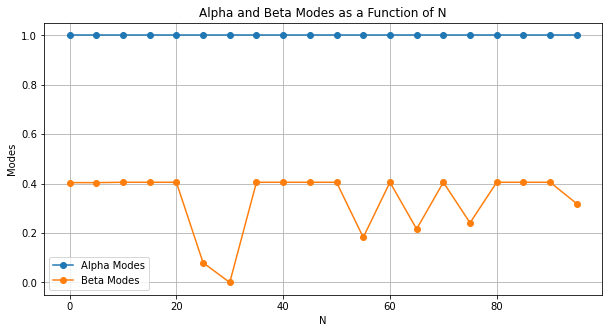

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import stats
import matplotlib.pyplot as plt

def acttatards(N, A, B):
    states, actions, R= [], [], []
    Q = {'6kHz': {'L': 0, 'R': 0}, '10kHz': {'L': 0, 'R': 0}}
    Q_history = [Q.copy()]
    for t in range(N):
        random_val = np.random.uniform(0, 1)
        random_val1 = np.random.uniform(0, 1)
        random_val2 = np.random.uniform(0, 1)
        if random_val < 0.5:
            states.append('6kHz')
        else:
            states.append('10kHz')
        
        P_L = np.exp(B * Q[states[t]]['L']) / (np.exp(B * Q[states[t]]['L']) + np.exp(B * Q[states[t]]['R']))
        action = 'L' if random_val1 <= P_L else 'R'
        actions.append(action)

        if ((states[t] == '6kHz' and actions[t] == 'L') or (states[t] == '10kHz' and actions[t] == 'R')) and (random_val2 < 0.9):
            R.append(1)
        elif ((states[t] == '6kHz' and actions[t] == 'R') or (states[t] == '10kHz' and actions[t] == 'L')) and (random_val2 < 1 - 0.9):
            R.append(1)
        else:
            R.append(0)

        Q[states[t]][actions[t]] = Q[states[t]][actions[t]] + A * (R[t] - Q[states[t]][actions[t]])
        Q_history.append(Q.copy())

    return actions, states, Q, Q_history, R

observed_actions, observed_states,_,_,observed_rewards = acttatards(3, 1, 0.404)

def DeltaLearningRule(N, A, B, actions, states, R):
    Q = {'6kHz': {'L': 0, 'R': 0}, '10kHz': {'L': 0, 'R': 0}}
    for t in range(N):
        Q[states[t]][actions[t]] = Q[states[t]][actions[t]] + A * (R[t] - Q[states[t]][actions[t]])
    return Q

def Log(N, Q, actions, states, B):
    Log, P = [], []
    epsilon = 1e-10  # small constant to avoid log(0)
    for t in range(N):
        if states[t]=='6kHz' and actions[t]=='L':
            P.append(np.exp(np.clip(B*Q['6kHz']['L'], -500, 500)) / (np.exp(np.clip(B*Q['6kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['6kHz']['R'], -500, 500))))
        elif states[t]=='6kHz' and actions[t]=='R':
            P.append(np.exp(np.clip(B*Q['6kHz']['R'], -500, 500)) / (np.exp(np.clip(B*Q['6kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['6kHz']['R'], -500, 500))))
        elif states[t]=='10kHz' and actions[t]=='R':
            P.append(np.exp(np.clip(B*Q['10kHz']['R'], -500, 500)) / (np.exp(np.clip(B*Q['10kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['10kHz']['R'], -500, 500))))
        else:  
            P.append(np.exp(np.clip(B*Q['10kHz']['L'], -500, 500)) / (np.exp(np.clip(B*Q['10kHz']['L'], -500, 500))+np.exp(np.clip(B*Q['10kHz']['R'], -500, 500))))
        Log.append(np.log(P[t] + epsilon)) 
    return Log


def neg_log_likelihood(params, N, actions, states, R):
    A, B = params
    Q = DeltaLearningRule(N, A, B, actions, states, R)
    log_likelihood = Log(N, Q, actions, states, B)
    return -np.sum(log_likelihood)


# Set the numbers of trials
Ns = np.arange(0, 100, 5)  # change as needed
num_runs = 1000

def alphbeta (acttatards, Ns, num_runs):
    # Initialize lists to hold the mode values
    alpha_modes = []
    beta_modes = []
    
    for N in Ns:
        alpha_estimates = np.zeros(num_runs)
        beta_estimates = np.zeros(num_runs)

        for i in range(num_runs):
            # Generate new observed data each time
            observed_actions, observed_states, _, _, observed_rewards = acttatards(N, 1, 0.404)

            # Provide some initial guess for alpha and beta
            initial_guess = [1, 0.404]

            # Use minimize function to estimate alpha and beta
            result = minimize(neg_log_likelihood, initial_guess, args=(N, observed_actions, observed_states, observed_rewards))

            # Store the estimates
            alpha_estimates[i], beta_estimates[i] = result.x

        alpha_modes.append(stats.mode(alpha_estimates))
        beta_modes.append(stats.mode(beta_estimates))

    alpha_modes = [mode.mode for mode in alpha_modes]
    beta_modes = [mode.mode for mode in beta_modes]


    return alpha_modes, beta_modes

alpha_modes, beta_modes = alphbeta(acttatards, Ns, num_runs)
print(alpha_modes, beta_modes)

# Plot alpha_modes and beta_modes vs Ns on the same graph
plt.figure(figsize=(10, 5))
plt.plot(Ns, alpha_modes, label='Alpha Modes', marker='o')
plt.plot(Ns, beta_modes, label='Beta Modes', marker='o')
plt.xlabel('N')
plt.ylabel('Modes')
plt.title('Alpha and Beta Modes as a Function of N')
plt.legend()
plt.grid()
plt.show()